# Convolutional Neural Network

### Importing the libraries

In [ ]:
import tensorflow as tf


In [ ]:
tf.__version__

'2.5.0'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

0## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [5]:
train_datagen = ImageDataGenerator(
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:\\Users\\WIN\\Desktop\\elephant',
                                                 target_size = (64, 64),
                                                 batch_size = 2,
                                                 class_mode = 'unary')

NameError: ignored

In [ ]:
training_set.class_indices

{'lion1': 0, 'tiger1': 1}

### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('/home/kcet/Desktop/classifier/data_set/test_data',
                                            target_size = (64, 64),
                                            batch_size = 2,
                                            class_mode = 'binary')

Found 418 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a third convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

# 1st dense layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# 2nd dense layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = testing_set, epochs = 30)

Epoch 1/30
589/589 [==============================] - 114s 193ms/step - loss: 0.5783 - accuracy: 0.6967 - val_loss: 0.4773 - val_accuracy: 0.8013
Epoch 2/30
589/589 [==============================] - 125s 212ms/step - loss: 0.5294 - accuracy: 0.7477 - val_loss: 0.2521 - val_accuracy: 0.9210
Epoch 3/30
589/589 [==============================] - 116s 196ms/step - loss: 0.5170 - accuracy: 0.7545 - val_loss: 0.2398 - val_accuracy: 0.8997
Epoch 4/30
589/589 [==============================] - 111s 188ms/step - loss: 0.5219 - accuracy: 0.7553 - val_loss: 0.5641 - val_accuracy: 0.7254
Epoch 5/30
589/589 [==============================] - 113s 192ms/step - loss: 0.4827 - accuracy: 0.7732 - val_loss: 0.3237 - val_accuracy: 0.8915
Epoch 6/30
589/589 [==============================] - 118s 200ms/step - loss: 0.4983 - accuracy: 0.7570 - val_loss: 0.3999 - val_accuracy: 0.8038
Epoch 7/30
589/589 [==============================] - 113s 193ms/step - loss: 0.4844 - accuracy: 0.7723 - val_loss: 0.2810 -

## Part 4 - Making a single prediction

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/home/kcet/Desktop/tiger.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] <= 0.7:
  prediction = 'lion'
else:
  prediction = 'tiger'

In [ ]:
print(prediction)

tiger


# saving the model

In [ ]:
cnn.save("cnn.Lion_tiger_classifier")
print("Saved model to disk")

INFO:tensorflow:Assets written to: cnn.Lion_tiger_classifier/assets
Saved model to disk


# loading the model

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import load_model


# load model
cnn = load_model('/home/kcet/Desktop/classifier/cnn.Lion_tiger_classifier')
# summarize model.
cnn.summary()

# split into input and output variables

# evaluate the model


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/home/kcet/Desktop/human image classifier/dataset/train_data',
                                                 target_size = (64, 64),
                                                 batch_size = 2,
                                                 class_mode = 'binary')

Found 2054 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('/home/kcet/Desktop/human image classifier/dataset/test_data',
                                            target_size = (64, 64),
                                            batch_size = 2,
                                            class_mode = 'binary')

Found 908 images belonging to 2 classes.


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image




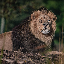

In [ ]:
test_image = image.load_img('/home/kcet/Desktop/user/lion581.jpg', target_size = (64, 64))
test_image

In [ ]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] <= 0.7:
  prediction = 'Lion'
else:
  prediction = "Tiger"

In [ ]:
print(prediction)

Lion
